### Imports

In [ ]:
import numpy as np, matplotlib.pyplot as plt, sympy as sy, math
from numpy import cos, arccos, sin, tan, sqrt,  array, pi, rad2deg, radians, linspace
from scipy import optimize, integrate
from astropy import units as u

### Defining $\dot{\overline{\omega}}$

In [ ]:
def omega_bar_dot(a, e, i, R, mu, J2):
    n = sqrt(mu/a**3)
    return 3/4 * n * J2 * (R/a)**2 * (5 * (cos(i))**2 - 1)/( (1-e**2)**2 )

### Defining $\dot{\overline{\Omega}}$

In [ ]:
def Omega_bar_dot(a, e, i, R, mu, J2):
    n = sqrt(mu/a**3)
    return -3/2 * n * J2 * (R/a)**2 * cos(i)/( (1-e**2)**2 )

# Question 1

### Given Values

In [ ]:
R = 6370
mu = 3.986e5
J2 = 0.00108
min_perigee = 600 + R
P = 1/3*(24*u.hour).to(u.s).value

### Finding $a$

In [ ]:
a = ( mu * (P/(2*pi))**2 )**(1/3)

### Finding $e_\text{max}$

In [ ]:
e_max = 1 - min_perigee/a

### Finding $i$

In [ ]:
i = arccos(sqrt(1/5))

In [ ]:
print(f"i = {i:0.5f} rad")
print(f"i = {rad2deg(i):0.5f} deg")
print(f"a = {a:0.5f} km")
print(f"e_max = {e_max:0.5f}")

### Determining the minimum value of Omega drift rate

In [ ]:
e_range = linspace(0., e_max, 100)

In [ ]:
Omega_vals = (Omega_bar_dot(a = a, e = e_range, i = i, R = R, mu = mu, J2 = J2))

In [ ]:
print(f"Min of drift rate = {min(Omega_vals):0.5g} rad/s occurs at e = {e_max:0.5f}")
print(f"Min of abs of drift rate = {min(abs(Omega_vals)):0.5g} rad/s occurs at e = {0.0}")

### Plotting drift rates

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(e_range, abs(Omega_vals))
plt.title(r"$|\dot{\overline{\Omega}}|$ vs e for Earth Molniya Orbit")
plt.xlabel("e")
plt.ylabel(r"$|\dot{\overline{\Omega}}|$ [rad/s]")
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(e_range, Omega_vals)
plt.title(r"$\dot{\overline{\Omega}}$ vs e for Earth Molniya Orbit")
plt.xlabel("e")
plt.ylabel(r"$\dot{\overline{\Omega}}$ [rad/s]")
plt.grid()
plt.show()

# Question 2

### Given Values

In [ ]:
R = 3390
mu = 4.282e4
J2 = 0.00196
min_perigee = 400 + R
P = (24*u.hour + 38*u.min + 35*u.s).to(u.s).value

### Finding $a$

In [ ]:
a = ( mu * (P/(2*pi))**2 )**(1/3)

### Finding $e_\text{max}$

In [ ]:
e_max = 1 - min_perigee/a

### Finding $i$

In [ ]:
i = arccos(sqrt(1/5))

In [ ]:
print(f"i = {i:0.5f} rad")
print(f"i = {rad2deg(i):0.5f} deg")
print(f"a = {a:0.5f} km")
print(f"e_max = {e_max:0.5f}")

### Determining the minimum value of Omega drift rate

In [ ]:
e_range = linspace(0., e_max, 100)

In [ ]:
Omega_vals = (Omega_bar_dot(a = a, e = e_range, i = i, R = R, mu = mu, J2 = J2))

In [ ]:
print(f"Min of drift rate = {min(Omega_vals):0.5g} rad/s occurs at e = {e_max:0.5f}")
print(f"Min of abs of drift rate = {min(abs(Omega_vals)):0.5g} rad/s occurs at e = {0.0}")

### Plotting drift rates

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(e_range, abs(Omega_vals))
plt.title(r"$|\dot{\overline{\Omega}}|$ vs e for Mars Molniya Orbit")
plt.xlabel("e")
plt.ylabel(r"$|\dot{\overline{\Omega}}|$ [rad/s]")
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(e_range, Omega_vals)
plt.title(r"$\dot{\overline{\Omega}}$ vs e for Mars Molniya Orbit")
plt.xlabel("e")
plt.ylabel(r"$\dot{\overline{\Omega}}$ [rad/s]")
plt.grid()
plt.show()

use Encke's method (pg 492 in Curtis pdf) for eq, 487 in algorithm

# Question 3

## Given

In [ ]:
mu = 3.986e5 # km^3/s^2
J2 = 0.00108
R = 6370 # km

a_0 = 26600 # km
i_0 = 1.10654 # rad
e_0 = 0.74
omega_0 = radians(5)
Omega_0 = radians(90)
M_0 = radians(10)

## Finding true anomaly from mean anomaly


In [ ]:
#  Kepler's Equation to find E
def kepler_ellipse(e: float, M: float) -> float: return lambda E: E - e*math.sin(E) - M

#  Use E to get f
def true_anomaly(e: float, M: float) -> float:
    initial_guess = M + e
    E = optimize.newton(kepler_ellipse(e, M), initial_guess, maxiter=10000, tol = 1e-15)
    nu = 2 * np.arctan( np.sqrt( (1+e)/(1-e) ) * np.tan(E/2) )
    if nu < 0: nu += 2*math.pi
    elif nu > math.pi*2: nu -= 2*math.pi
    return nu

### Orbital Elements to State Vector

In [ ]:
def elem2state(a, e, i, raan, aop, f, mu, radians = True):
    if not radians:
        i, raan, aop, f = np.radians(i), np.radians(raan), np.radians(aop), np.radians(f)
        
    theta = aop + f
    
    # finding r
    r_norm = a*(1-e**2)/(1+e*np.cos(f))
    r = r_norm*np.array([
        np.cos(theta)*np.cos(raan) - np.cos(i)*np.sin(raan)*np.sin(theta),
        np.cos(theta)*np.sin(raan) + np.cos(i)*np.cos(raan)*np.sin(theta),
        np.sin(i)*np.sin(theta),
    ])
    
    # finding h -> used to find v
    h = np.sqrt(mu * a * (1 - e **2))
    
    # finding v
    v = np.array([
        -mu/h * ( np.cos(raan)*(np.sin(theta) + e*np.sin(aop)) + np.sin(raan)*(np.cos(theta) + e*np.cos(aop))*np.cos(i) ),
        -mu/h * ( np.sin(raan)*(np.sin(theta) + e*np.sin(aop)) - np.cos(raan)*(np.cos(theta) + e*np.cos(aop))*np.cos(i) ),
        mu/h * ( (np.cos(theta) + e*np.cos(aop))*np.sin(i) )
    ])
    
    return np.array([*r, *v])

### Initial State

In [ ]:
v_0 = true_anomaly(e = e_0, M = M_0)
y_0 = elem2state(a = a_0, e = e_0, i = i_0, raan = Omega_0, aop = omega_0, f = v_0, mu = mu, radians = True)

### State Vector to Orbital Elements

In [ ]:
# getting orbital elements from r and v
def state2elem(r, v, mu):
    mu_E = 398600
    def h(r, v): return np.cross(r,v)

    def a(r, v, mu = mu_E):
        return (2/np.linalg.norm(r) - np.linalg.norm(v)**2/mu)**-1

    def e(r, v, mu = mu_E):
        return 1/mu*np.cross(v, h(r, v)) - r/np.linalg.norm(r)

    def inclination(r, v):
        h_vec = h(r, v)
        return np.arccos( np.dot(h_vec, np.array([0, 0, 1]))/np.linalg.norm(h_vec) )

    def nodes(r, v):
        return np.cross( np.array([0, 0, 1]), h(r, v) )

    def raan(r, v):
        n = nodes(r, v)
        return np.arccos( np.dot( n, np.array([1, 0, 0]) ) / np.linalg.norm(n) )

    def argument_of_periapsis(r, v, mu = mu_E):
        n = nodes(r, v)
        return np.arccos( np.dot(n, e(r, v)) / ( np.linalg.norm(n)*np.linalg.norm(e(r, v)) ) )

    def f(r, v, mu = mu_E): 
        h_mag = np.linalg.norm(h(r, v))
        e_mag = np.linalg.norm(e(r, v, mu))
        r_mag = np.linalg.norm(r)
        nu = np.arccos( 1/e_mag * (h_mag**2 / (mu*r_mag) - 1) )
        if np.dot(r, v) < 0:
            nu = 2*np.pi - nu
        return nu
    
    return a(r, v, mu), np.linalg.norm(e(r, v, mu)), inclination(r, v), argument_of_periapsis(r, v, mu), raan(r, v), f(r, v)

## Algorithm 10.1 in Curtis

### Perturbations

In [ ]:
def p(r, J2, mu, R):
    x = r[0]
    y = r[1]
    z = r[2]
    r_norm = np.linalg.norm(r)
    return 3/2 * J2*mu*R**2 / r_norm**4 * np.array([ 
                                                  x/r_norm * (5*z**2 / r_norm**2 - 1), 
                                                  y/r_norm * (5*z**2 / r_norm**2 - 1),
                                                  z/r_norm * (5*z**2 / r_norm**2 - 3),
                                                  ])


### Avoiding divide by zero

In [ ]:
def q(r, delta_r):
    return np.dot(delta_r, (2*r - delta_r)/np.linalg.norm(r)**2)

def F(q):
    return (q**2 - 3*q + 3)/(1 + (1 - q)**(3/2)) * q

### Step 1

In [ ]:
delta_r = np.array([0., 0., 0.])
delta_v = np.array([0., 0., 0.])
delta_y = np.array([*delta_r, *delta_v])

### Step 2

GDE

In [ ]:
def f(
    t, 
    y, 
    delta_y,
    y_osc,
    mu, 
    J2, 
    R
    ):
    """_summary_

    Args:
        t (float): time
        y (array): state vector
        delta_y (array): deviation of orbit from oscullating orbit
        y_osc (array): oscullating state at time t
        J2 (float): magnitude of J2
        R (float): Radius of body

    Returns:
        array: time rate of delta_r and delta_v
    """    
    r, v = y[0:3], y[3:]
    
    delta_r, delta_v = delta_y[0:3], delta_y[3:]
    
    r_osc, v_osc = y_osc[0:3], y_osc[3:]
    
    delta_a = -mu * ( delta_r - F(q(r, delta_r)) )/np.linalg.norm(r_osc)**3 + p(r, J2, mu, r)
    
    return np.array([ *delta_v, *delta_a ])

Oscullating Orbit Propagator (from hw1)

Create a Universal Variable Two Body Propogator

In [ ]:
def C(z):

    return_val = None

    if z > 0:
        z = float(z)

        return_val = ( 1 - np.cos( np.sqrt(z) ) ) / z

    elif z < 0:
        z_sym = sy.symbols("z_sym")
        f = ( sy.cosh( sy.sqrt(-z_sym) )-1 ) / ( -z_sym )

        return_val = float( f.subs(z_sym, z).evalf() )

    else:
        return_val = 1/2

    return return_val
    
def S(z):

    return_val = None

    if z > 0:
        z = float(z)

        return_val = ( np.sqrt(z) - np.sin(np.sqrt(z)) ) / np.sqrt(z)**3

    elif z<0:
        z_sym = sy.symbols("z_sym")
        f = ( sy.sinh(sy.sqrt(-z_sym)) - sy.sqrt(-z_sym) ) / sy.sqrt(-z_sym)**3

        return_val = float(f.subs(z_sym, z).evalf())

    else:
        return_val = 1/6

    return return_val

In [ ]:
def kepler(chi: float, mu: float, r_0_mag: float, v_r_0: float, alpha: float, delta_t: float) -> float:
    z = alpha*chi**2
    return (r_0_mag * v_r_0)/np.sqrt(mu) * chi**2 * C(z) + (1-alpha*r_0_mag)*chi**3 * S(z) + r_0_mag * chi - np.sqrt(mu)*delta_t

def kepler_prime(chi: float, mu: float, r_0_mag: float, v_r_0: float, alpha: float) -> float:
    z = alpha*chi**2
    return (r_0_mag * v_r_0)/np.sqrt(mu) * chi * ( 1 - alpha*chi**2 * S(z) ) + (1 - alpha*r_0_mag)*chi**2*C(z) + r_0_mag

def solve_kepler(mu: float, r_0_mag: float, v_r_0: float, alpha: float, delta_t: float, chi_0: float = None, tol = 1e-8, max_iter = 100):

    # if not provided, creating an initial guess for chi
    if not chi_0:
        chi_0 = np.sqrt(mu)*np.abs(alpha)*(delta_t)
    # creating f / fprime
    ratio_i =  kepler(chi_0, mu, r_0_mag, v_r_0, alpha, delta_t) / kepler_prime(chi_0, mu, r_0_mag, v_r_0, alpha)
    
    # starting iterations for newtons method
    chi_i = chi_0
    iter = 0
    while np.abs(ratio_i) > tol and iter <= max_iter:
        chi_i -= ratio_i
        ratio_i =  kepler(chi_i, mu, r_0_mag, v_r_0, alpha, delta_t) / kepler_prime(chi_i, mu, r_0_mag, v_r_0, alpha)
        iter += 1
    
    return chi_i

In [ ]:
# deriving state vector for a given delta t
def propogate_orbit(r_0, v_0, delta_t, mu):

    # f and g functions
    def f(chi: float, alpha: float, r_0_mag: float): return 1 - (chi**2 / r_0_mag) * C(alpha*chi**2)

    def g(chi: float, alpha: float, delta_t: float, mu: float): return delta_t - 1/np.sqrt(mu) * chi**3 * S(alpha*chi**2)

    def f_dot(mu: float, r_0_mag: float, r_mag: float, alpha: float, chi: float):
        return np.sqrt(mu)/(r_mag*r_0_mag)*( alpha*chi**3 * S(alpha*chi**2) - chi)

    def g_dot(chi: float, alpha: float, r_mag: float):
        return 1 - chi**2 / r_mag * C(alpha*chi**2)
    
    r_0_mag = np.linalg.norm(r_0)
    v_0_mag = np.linalg.norm(v_0)

    v_r_0 = np.dot(r_0, v_0) / r_0_mag

    alpha = 2/r_0_mag - v_0_mag**2 / mu

    chi = solve_kepler(mu = mu, r_0_mag = r_0_mag, v_r_0 = v_r_0, alpha = alpha, delta_t = delta_t)
    r = f(chi = chi, alpha = alpha, r_0_mag = r_0_mag)*r_0 + g(chi = chi, alpha = alpha, delta_t = delta_t, mu = mu)*v_0
    r_mag = np.linalg.norm(r)

    v = f_dot(mu = mu, r_0_mag = r_0_mag, r_mag = r_mag, alpha = alpha, chi = chi)*r_0 + g_dot(chi = chi, alpha = alpha, r_mag = r_mag)*v_0

    return r, v


    # table of values for rkf45
    a = np.array([0, 1/4, 3/8, 12/13, 1, 1/2])
    b = np.array([
        [0, 0, 0, 0, 0],
        [1/4, 0, 0, 0, 0],
        [3/32, 9/32, 0, 0, 0],
        [1932/2197, -7200/2197, 7296/2197, 0, 0],
        [439/216, -8, 3680/513, -845/4104, 0],
        [-8/27, 2, -3544/2565, 1859/4104, -11/40]
    ])

    c5 = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]

## rkf45 integration function

In [ ]:
def rkf45(
    f,
    t, 
    delta_y,
    y_0,
    mu, 
    J2, 
    R
    ):
    
    
    # delta_r_i and delta_v_i
    delta_r_i, delta_v_i = delta_y[0:3], delta_y[3:]
    
    # calculating r_osc, v_osc from r_0, v_0
    r_0, v_0 = y_0[0:3], y_0[3:]
    
    r_osc_i, v_osc_i = propogate_orbit(r_0, v_0, t, mu)
    y_osc = np.array([*r_osc_i, *v_osc_i])

    # calculating r_i and v_ia
    r_i = r_osc_i + delta_r_i
    v_i = v_osc_i + delta_v_i
    y = np.array([*r_i, *v_i])
    
    # stepping to find the next delta_r and delta_v
    k1 = step*f( t, y, delta_y, y_osc, mu, J2, R )
    
    k2 = step*f( t, y, 
                delta_y + 1/4*k1,
                y_osc, mu, J2, R )
    
    k3 = step*f( t, y, 
                delta_y + 3/32*k1 + 9/32*k2,
                y_osc, mu, J2, R )
    
    k4 = step*f( t, y, 
                delta_y + 1932/2197*k1 + -7200/2197*k2 + 7296/2197*k3,
                y_osc, mu, J2, R )
    
    k5 = step*f(  t, y, 
                delta_y + 439/216*k1 - 8*k2 + 3680/513*k3 - 845/4104*k4, 
                y_osc, mu, J2, R)
    
    k6 = step*f( t, y, 
                delta_y - 8/27*k1 + 2*k2 - 3544/2565*k3 + 1859/4104*k4 - 11/40*k5, 
                y_osc, mu, J2, R)
    
    delta_y = delta_y + 16/135*k1 + 0*k2 + 6656/12825*k3 + 28561/56430*k4 - 9/50*k5 + 2/55*k1
    
    return delta_y, y, y_osc

### Integrating ODE

In [ ]:
start = 0
stop = (10*u.day).to(u.s).value
step = 100
orbit_tol = 1e-3

In [ ]:

time = 0
times = []
a_list = []
e_list = []
i_list = []
omega_list = []
Omega_list = []

while time <= stop:
    times.append((time*u.s).to(u.day).value)
    # print time if a new day starts
    if  (time*u.s).to(u.day).value in range(101):  
        print(f"===============\nTime = {(time*u.s).to(u.day)}\n===============")
        
    # step through propogator
    delta_y, y, y_osc = rkf45(f, time, delta_y, y_0, mu, J2, R)
    
    # assign r and v
    r, v = y[0:3], y[3:]
    
    a, e, i, w, o, nu = state2elem(r, v, mu)
    
    a_list.append(a)
    e_list.append(e)
    i_list.append(i)
    omega_list.append(w)
    Omega_list.append(o)
    
    # assign delta_r and delta_v
    delta_r, delta_v = delta_y[0:3], delta_y[3:]
    
    # assign r_osc and v_osc
    r_osc, v_osc = y_osc[0:3], y_osc[3:]
    
    if np.linalg.norm(delta_r)/np.linalg.norm(r_osc) > orbit_tol:
        y_0 = y
        
    time += step

### Solving ODE w/ scipy

In [ ]:
def j2_perturbation(q, t, mu = 398600, R = 6378):
    
    # seperates q into r and v
    r, v = q[:3], q[3:]
    r_norm = np.linalg.norm(r)
    
    J_2 = 0.00108263
    p = 3/2 * J_2 * mu * R **2 /(r_norm**4) * np.array([
        r[0]/r_norm*( 5*(r[2]/r_norm)**2 - 1 ),
        r[1]/r_norm*( 5*(r[2]/r_norm)**2 - 1 ),
        r[2]/r_norm*( 5*(r[2]/r_norm)**2 - 3 ),
    ])
    
    r_ddot = -mu * r/(r_norm**3) + p # creates r double dot equation for J2 perturbation
    
    r_dot, v_dot = v, r_ddot # makes second order ODE a system of first order ODEs
    q_dot = np.array([*r_dot, *v_dot])
    
    return q_dot

In [ ]:
times = np.arange(0, (100*u.day).to(u.s).value, 100) # time steps for ivp

x_0 = np.array([y_0]) # initial conditions for ivp
x_t = integrate.odeint(func = j2_perturbation, t = times, y0 = y_0)
r_t = x_t[:, :3]
v_t = x_t[:, 3:]
print(f"r_f = {np.array2string(r_t[-1], precision=4, separator=', ')} km")
print(f"v_f = {np.array2string(v_t[-1], precision=4, separator=', ')} km/s")

r_f = [-3118.3041,  5270.7291,  3237.1067] km
v_f = [-7.1943, -3.6506,  0.7328] km/s


In [ ]:
a_t, e_t, i_t, raan_t, aop_t, f_t = [], [], [], [], [], []
for i in range(len(times)):
    a_i, e_i, i_i, raan_i, aop_i, f_i = state2elem(r_t[i], v_t[i], mu = mu)
    a_t.append(a_i)
    e_t.append(e_i)
    i_t.append(np.rad2deg(i_i))
    raan_t.append(np.rad2deg(raan_i))
    aop_t.append(np.rad2deg(aop_i))
    f_t.append(np.rad2deg(f_i))

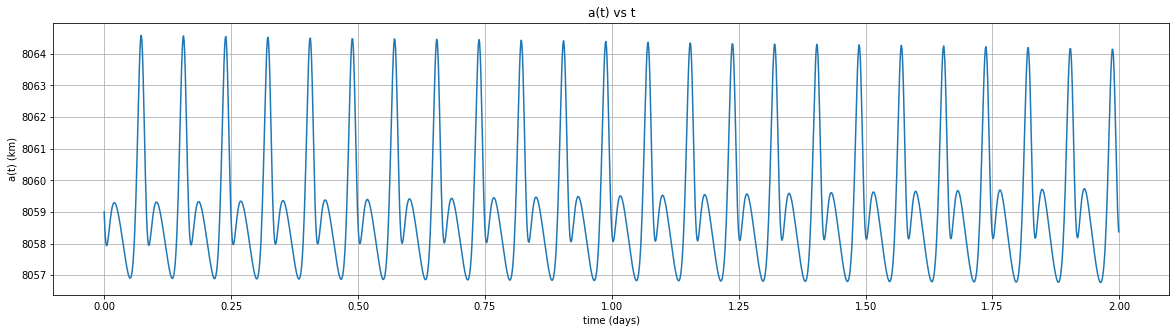

(None,
 Text(0.5, 17.200000000000003, 'time (days)'),
 Text(17.200000000000017, 0.5, 'a(t) (km)'),
 Text(0.5, 1.0, 'a(t) vs t'),
 None)

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.plot(times/24/3600, a_t)
plt.grid(), plt.xlabel("time (days)"), plt.ylabel("a(t) (km)"), plt.title("a(t) vs t"), plt.show()

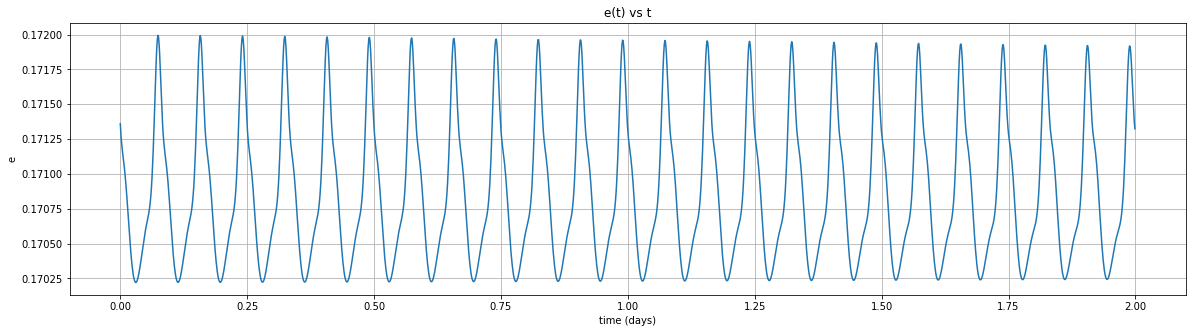

(None,
 Text(0.5, 17.200000000000003, 'time (days)'),
 Text(17.200000000000017, 0.5, 'e'),
 Text(0.5, 1.0, 'e(t) vs t'),
 None)

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.plot(times/24/3600, e_t)
plt.grid(), plt.xlabel("time (days)"), plt.ylabel("e"), plt.title("e(t) vs t"), plt.show()

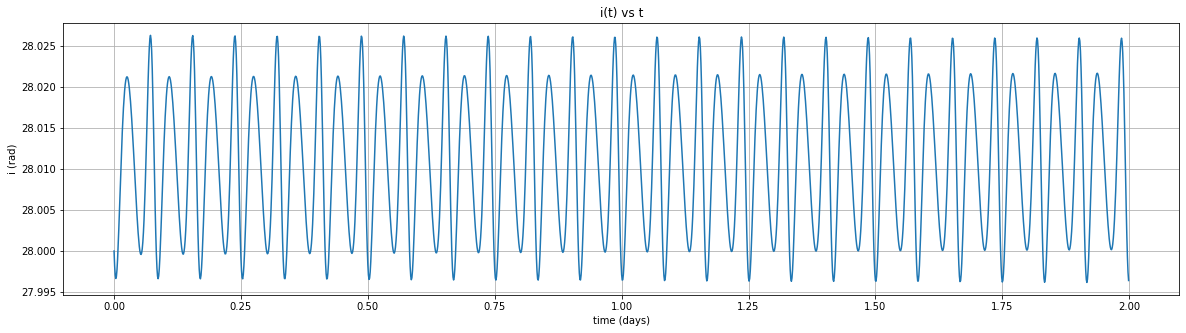

(None,
 Text(0.5, 17.200000000000003, 'time (days)'),
 Text(17.200000000000017, 0.5, 'i (rad)'),
 Text(0.5, 1.0, 'i(t) vs t'),
 None)

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.plot(times/24/3600, i_t)
plt.grid(), plt.xlabel("time (days)"), plt.ylabel("i (rad)"), plt.title("i(t) vs t"), plt.show()

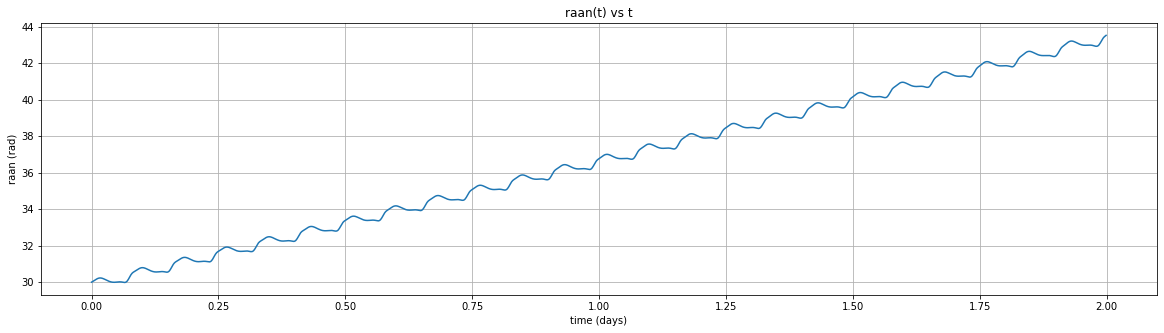

(None,
 Text(0.5, 17.200000000000003, 'time (days)'),
 Text(17.19999999999999, 0.5, 'raan (rad)'),
 Text(0.5, 1.0, 'raan(t) vs t'),
 None)

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.plot(times/24/3600, raan_t)
plt.grid(), plt.xlabel("time (days)"), plt.ylabel("raan (rad)"), plt.title("raan(t) vs t"), plt.show()

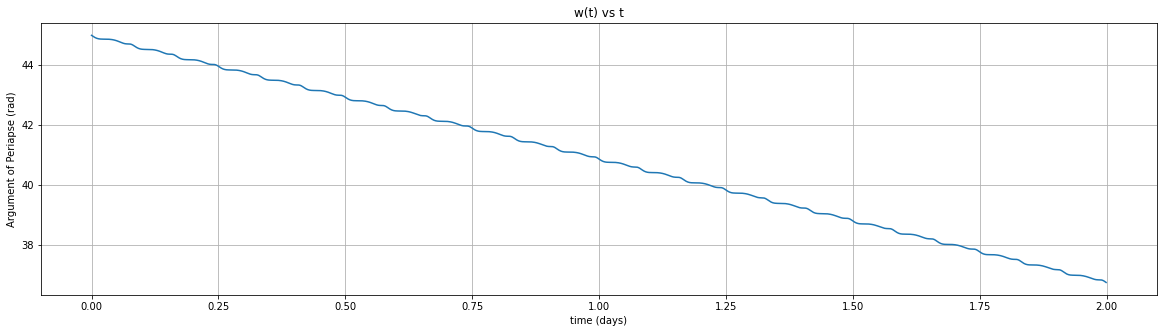

(None,
 Text(0.5, 17.200000000000003, 'time (days)'),
 Text(17.19999999999999, 0.5, 'Argument of Periapse (rad)'),
 Text(0.5, 1.0, 'w(t) vs t'),
 None)

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.plot(times/24/3600, aop_t)
plt.grid(), plt.xlabel("time (days)"), plt.ylabel("Argument of Periapse (rad)"), plt.title("w(t) vs t"), plt.show()